# Web Scraping Popular Books on Goodreads using Python

In [1]:
# importing required libraries
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd

from IPython.display import display, Image

In [2]:
base_url = "https://www.goodreads.com"
genres_url = "https://www.goodreads.com/genres"

In [3]:
response = requests.get(genres_url)
response.status_code

200

The status code provides information about the request. If the request was completed successfully then status code should be 200. List of other status codes https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

## Extracting genres
First I will extract the genres of the books from the genres page and store it in a dictionary

In [5]:
doc = BeautifulSoup(response.text, 'html.parser')
genre_tags = doc.find_all('div', class_="rightContainer")[0].find_all('a')
genre_names = [tag.text for tag in genre_tags][1:-1]
genre_links = [tag['href'] for tag in genre_tags][1:-1]
genre_most_popular_dict = {name: base_url + "/shelf/show" + link[7:] for (name, link) in zip(genre_names, genre_links)}
genre_most_popular_dict

{'Art': 'https://www.goodreads.com/shelf/show/art',
 'Biography': 'https://www.goodreads.com/shelf/show/biography',
 'Business': 'https://www.goodreads.com/shelf/show/business',
 'Chick Lit': 'https://www.goodreads.com/shelf/show/chick-lit',
 "Children's": 'https://www.goodreads.com/shelf/show/children-s',
 'Christian': 'https://www.goodreads.com/shelf/show/christian',
 'Classics': 'https://www.goodreads.com/shelf/show/classics',
 'Comics': 'https://www.goodreads.com/shelf/show/comics',
 'Contemporary': 'https://www.goodreads.com/shelf/show/contemporary',
 'Cookbooks': 'https://www.goodreads.com/shelf/show/cookbooks',
 'Crime': 'https://www.goodreads.com/shelf/show/crime',
 'Ebooks': 'https://www.goodreads.com/shelf/show/ebooks',
 'Fantasy': 'https://www.goodreads.com/shelf/show/fantasy',
 'Fiction': 'https://www.goodreads.com/shelf/show/fiction',
 'Gay and Lesbian': 'https://www.goodreads.com/shelf/show/gay-and-lesbian',
 'Graphic Novels': 'https://www.goodreads.com/shelf/show/graphic

In [6]:
len(genre_most_popular_dict)

40

There are 40 genres in total. Let's pick anyone and start exploring the most popular books from that genre. 

I will pick my favorite the science-fiction genre.

## Exploring Science Fiction

In [7]:
sf_url = genre_most_popular_dict['Science Fiction']
sf_url

'https://www.goodreads.com/shelf/show/science-fiction'

In [8]:
# Get the content from this url using a get request
response = requests.get(sf_url)

The get method fetches the html of the page given the url address

In [15]:
import pprint
# pprint.pprint(response.text)

The html doesn't look very neat in itself so we parse it using tht bs4 library 

### Parsing the HTML

In [16]:
# Parsing the html using beautiful soup
doc = BeautifulSoup(response.text, 'html.parser')

This doc contains all the information we need.

### Extracting div tags

By inspecting the html, we find that the "left" class of the div element contains the information about all the listed books.

In [21]:
# Extract all book tags from the science-fiction genre
book_tags = doc.find_all('div', class_="left")
book_tags[0]

<div class="left" style="width: 75%;">
<a class="leftAlignedImage" href="/book/show/44767458-dune" title="Dune (Dune, #1)"><img alt="Dune (Dune, #1)" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1555447414l/44767458._SY75_.jpg"/></a>
<a class="bookTitle" href="/book/show/44767458-dune">Dune (Dune, #1)</a>
<br/>
<span class="by">by</span>
<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/58.Frank_Herbert" itemprop="url"><span itemprop="name">Frank Herbert</span></a>
</div>
</span>


              (shelved 18366 times as <em>science-fiction</em>)     

              <br/>
<span class="greyText smallText">
                avg rating 4.26 —
                1,228,957 ratings  —
                published 1965
              </span>
</div>

We should be able to get the book information from this simple html. Looks like most of the information is contained in the a tags. Let's have a look at them.

In [26]:
a_tags = book_tags[0].find_all('a')
a_tags

[<a class="leftAlignedImage" href="/book/show/44767458-dune" title="Dune (Dune, #1)"><img alt="Dune (Dune, #1)" src="https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1555447414l/44767458._SY75_.jpg"/></a>,
 <a class="bookTitle" href="/book/show/44767458-dune">Dune (Dune, #1)</a>,
 <a class="authorName" href="https://www.goodreads.com/author/show/58.Frank_Herbert" itemprop="url"><span itemprop="name">Frank Herbert</span></a>]

### Extracting book info

As we can see the first a tag contain the page url and image of the book, the second contain the title and the third contain the author's name

https://www.goodreads.com/book/show/44767458-dune


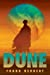

In [39]:
book_url = base_url + a_tags[0]['href']
print(book_url)
book_img = a_tags[0].find('img')['src']
display(Image(book_img, width=80))

In [44]:
book_title = a_tags[1].text
book_title

'Dune (Dune, #1)'

In [64]:
author_link = a_tags[2]['href']
print(author_link)
author_name = a_tags[2].text
print(author_name)

https://www.goodreads.com/author/show/58.Frank_Herbert
Frank Herbert


In book tags the class greyText smallText contains the rating, number of ratings and the publishing year of the book

In [68]:
metadata = book_tags[0].find(class_='greyText smallText')
metadata

<span class="greyText smallText">
                avg rating 4.26 —
                1,228,957 ratings  —
                published 1965
              </span>

In [80]:
book_score = metadata.text.strip().split()[2]
print("Score:", book_score)
num_ratings = metadata.text.strip().split()[4]
print("Ratings:", num_ratings)
year_published = metadata.text.strip().split()[-1]
print("Published:", year_published)

Score: 4.26
Ratings: 1,228,957
Published: 1965


That's all the information given for a book on the page.

Now let's combine our results to get info for the top 50 most popular books in the science fiction genre

In [113]:
# Get information about the book from the book tag
def get_book_info(book_tag, base_url="https://www.goodreads.com"):
    # Extract <a> tags and metadata
    a_tags = book_tag.find_all('a')
    metadata = book_tag.find(class_='greyText smallText')
    
    # Get book url
    book_url = base_url + a_tags[0]['href']
    # Get book image
    book_img = a_tags[0].find('img')['src']
    # Get book title
    book_title = a_tags[1].text
    # Get author's name and url
    author_link = a_tags[2]['href']
    author_name = a_tags[2].text
    # Get book score
    book_score = metadata.text.strip().split()[2]
    # Get book ratings
    num_ratings = metadata.text.strip().split()[4]
    # Get publishing year
    year_published = metadata.text.strip().split()[-1]
    
    # Storing all of it in a dictionary
    book_dict = {'Title': book_title,
                 'Author': author_name,
                 'Score': book_score,
                 'Ratings': num_ratings,
                 'Published': year_published,
                 'url': book_url,
                 'img': book_img,
                 'author_url': author_link}
    
    return book_dict

### Display book info

In [114]:
def display_book_info(book_tag):
    book_dict = get_book_info(book_tag)
    print(book_dict['Title'])
    print(book_dict['url'])
    display(Image(book_dict['img'], width=80))
    print('by')
    print(book_dict['Author'])
    print(book_dict['author_url'])
    print()
    print("Score:", book_dict['Score'])
    print("Ratings:", book_dict['Ratings'])
    print("Published:", book_dict['Published'])

The above function combines all our previous steps and prints the book info in a pretty manner. Let's see it in action

Snow Crash (Kindle Edition)
https://www.goodreads.com/book/show/40651883-snow-crash


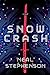

by
Neal Stephenson
https://www.goodreads.com/author/show/545.Neal_Stephenson

Score: 4.02
Ratings: 270,993
Published: 1992


In [130]:
# Display any book from the top 50 popular books of science fiction
display_book_info(book_tags[36])

Now let's go through all the books and store them in a dictionary for easy retrieval. This can be done in a single line like this:

### Create dictionary for each book

In [131]:
all_books_sf = [get_book_info(tag) for tag in book_tags]
all_books_sf[-2:]

[{'Title': 'Starship Troopers (Mass Market Paperback)',
  'Author': 'Robert A. Heinlein',
  'Score': '4.01',
  'Ratings': '220,291',
  'Published': '1959',
  'url': 'https://www.goodreads.com/book/show/17214.Starship_Troopers',
  'img': 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1614054412l/17214._SY75_.jpg',
  'author_url': 'https://www.goodreads.com/author/show/205.Robert_A_Heinlein'},
 {'Title': 'The Forever War (The Forever War, #1)',
  'Author': 'Joe Haldeman',
  'Score': '4.14',
  'Ratings': '160,844',
  'Published': '1974',
  'url': 'https://www.goodreads.com/book/show/21611.The_Forever_War',
  'img': 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1386852511l/21611._SY75_.jpg',
  'author_url': 'https://www.goodreads.com/author/show/12476.Joe_Haldeman'}]

We can extend this for any genre we like. To do that let's write another function that will combine all of what we have done so far into a single function

## Extracting popular books from any genre

In [134]:
def get_books_by_genre(genre_most_popular_dict, genre):
    genre_url = genre_most_popular_dict[genre]
    response = requests.get(genre_url)
    doc = BeautifulSoup(response.text, 'html.parser')
    book_tags = doc.find_all('div', class_="left")
    all_books = [get_book_info(tag) for tag in book_tags]
    
    return all_books

In [143]:
get_books_by_genre(genre_most_popular_dict, 'Mystery')

[{'Title': 'And Then There Were None (Paperback)',
  'Author': 'Agatha Christie',
  'Score': '4.28',
  'Ratings': '1,240,317',
  'Published': '1939',
  'url': 'https://www.goodreads.com/book/show/16299.And_Then_There_Were_None',
  'img': 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1638425885l/16299._SY75_.jpg',
  'author_url': 'https://www.goodreads.com/author/show/123715.Agatha_Christie'},
 {'Title': 'Murder on the Orient Express (Hercule Poirot, #10)',
  'Author': 'Agatha Christie',
  'Score': '4.20',
  'Ratings': '569,382',
  'Published': '1934',
  'url': 'https://www.goodreads.com/book/show/853510.Murder_on_the_Orient_Express',
  'img': 'https://i.gr-assets.com/images/S/compressed.photo.goodreads.com/books/1486131451l/853510._SY75_.jpg',
  'author_url': 'https://www.goodreads.com/author/show/123715.Agatha_Christie'},
 {'Title': 'The Girl with the Dragon Tattoo (Millennium, #1)',
  'Author': 'Stieg Larsson',
  'Score': '4.16',
  'Ratings': '3,056,927',
  '

### Creating dataframe

In [152]:
scifi_df = pd.DataFrame(all_books_sf).iloc[:,:-3]
scifi_df.head()

,Title,Author,Score,Ratings,Published
0,"Dune (Dune, #1)",Frank Herbert,4.26,"1,228,957",1965
1,"Ender’s Game (Ender's Saga, #1)",Orson Scott Card,4.31,"1,321,537",1985
2,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.23,"1,758,596",1979
3,The Martian (Hardcover),Andy Weir,4.41,"1,054,000",2011
4,"Ready Player One (Ready Player One, #1)",Ernest Cline,4.23,"1,102,854",2011


Now let's load all of into a csv file

In [153]:
scifi_df.to_csv('science-fiction.csv')